## Project Overview

In less than 10 years, Airbnb has completed disrupted the hospitality market with about 150 million users on its platform and 40% revenue growth in 2018. Their business model has become more and more attractive for homeowners who are looking for regular additional income by renting out their place to local visitors.


## Business understanding & Problem Statement

In this project, we will dive into the Seattle Airbnb Open Data set available on Kaggle platform to analyse the hosting market in 2016 and provide some insights for homeowners looking to set up their business plan.

We will mainly focus on three aspects:

- What are the key factors that would impact a host pricing strategy?
- What are the market trends in term of booking and listing vacancy?
- What are the key features that influence customer review?

We will try to answer those questions through various descriptive or inferential statistics and visualizations that can be easily communicated to potential business partners.

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
# read the csv files
calendar = pd.read_csv('calendar.csv')
listing = pd.read_csv('listings.csv')

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Checking number of unique value
calendar.nunique()

listing_id    3818
date           365
available        2
price          669
dtype: int64

In [5]:
calendar['listing_id'].nunique()

3818

In [6]:
# Checking missing value
calendar.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
# Checking duplicate 
calendar.duplicated().sum()

0

### 1. Calendar Data cleaning

In [8]:
# Convert float to datetime
calendar['date'] = calendar['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [9]:
# Change availability encoding to 1 and 0 
calendar['available'] = calendar['available'].apply(lambda x: 1 if x=='t' else 0)

In [10]:
# Create booking features   
calendar['unavailable'] = calendar.apply(lambda x: 1 if x['available']==0 else 0, axis=1)

In [11]:
# Remove comma and dollar sign and convert to float
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)

In [12]:
# Determine the membership subcription time range
first_calendar = calendar['date'].sort_values(ascending=False).tail(1).iloc[0]
last_calendar = calendar['date'].sort_values(ascending=False).head(1).iloc[0]
print('The calendar time ranges between {:%Y-%m-%d} and {:%Y-%m-%d}'.format(first_calendar,last_calendar))

The calendar time ranges between 2016-01-04 and 2017-01-02


### 2. Listing Data cleaning

In [13]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [14]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [15]:
# Drop columns from 'listing_url' to 'host response time" 
listing_cleaned = listing.drop(listing.iloc[:, 1:23], axis=1) 

# Drop columns from 'host_thumbnail_url' to 'host_verifications" 
listing_cleaned = listing_cleaned.drop(listing_cleaned.iloc[:, 4:10], axis=1) 

# Drop columns from 'host_identity_verified' to 'neighbourhood_cleansed
listing_cleaned = listing_cleaned.drop(listing_cleaned.iloc[:, 4:9], axis=1) 

# Drop columns from 'host_identity_verified' to 'neighbourhood_cleansed
listing_cleaned = listing_cleaned.drop(listing_cleaned.iloc[:, 5:15], axis=1) 

# Drop columns from 'host_identity_verified' to 'neighbourhood_cleansed
listing_cleaned = listing_cleaned.drop(['calendar_updated','calendar_last_scraped','requires_license',
                                       'license','jurisdiction_names','require_guest_profile_picture',
                                       'require_guest_phone_verification', 'amenities','has_availability'], axis=1)

In [16]:
# Change t and f encoding to 1 and 0 
fields = ['host_is_superhost','instant_bookable']
for field in fields: 
    listing_cleaned[field] = listing_cleaned[field].apply(lambda x: 1 if x=='t' else 0)

In [17]:
# Remove comma and dollar sign and convert to float
prices = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
for price in prices:
    listing_cleaned[price] = listing_cleaned[price].str.replace(',', '')
    listing_cleaned[price] = listing_cleaned[price].str.replace('$', '')
    listing_cleaned[price] = listing_cleaned[price].astype(float)

In [18]:
# Convert date from float to datetime
dates = ['first_review','last_review']
for date in dates:
    listing_cleaned[date] = pd.to_datetime(listing_cleaned[date])

In [19]:
# Rename neighbourhood
listing_cleaned = listing_cleaned.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'})

In [20]:
# Fill nan by 0
charges = ['security_deposit','cleaning_fee']
for charge in charges:
    listing_cleaned[charges] = listing_cleaned[charges].fillna(0)

In [21]:
listing_cleaned.T

,0,1,2,3,4,5,6,7,8,9,...,3808,3809,3810,3811,3812,3813,3814,3815,3816,3817
id,241032,953595,3308979,7421966,278830,5956968,1909058,856550,4948745,2493658,...,1844791,6120046,262764,8578490,3383329,8101950,8902327,10267360,9604740,10208623
host_response_rate,96%,98%,67%,NaN,100%,NaN,100%,100%,NaN,98%,...,100%,100%,100%,100%,100%,99%,100%,NaN,100%,100%
host_acceptance_rate,100%,100%,100%,NaN,NaN,NaN,100%,100%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,NaN,NaN,NaN
host_is_superhost,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
neighbourhood,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne,Queen Anne,...,Other neighborhoods,Other neighborhoods,Other neighborhoods,Other neighborhoods,Other neighborhoods,Other neighborhoods,Capitol Hill,Rainier Valley,Capitol Hill,Queen Anne
property_type,Apartment,Apartment,House,Apartment,House,House,House,Cabin,Apartment,Apartment,...,House,Apartment,House,Apartment,Apartment,House,Apartment,House,Condominium,Apartment
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Private room,Entire home/apt,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
accommodates,4,4,11,3,6,2,2,2,2,4,...,6,4,5,3,4,6,4,2,2,3
bathrooms,1,1,4.5,1,2,1,1,1,1,1,...,2,1,1,1,1,2,1,1,1,1.5
bedrooms,1,1,5,0,3,1,1,1,1,1,...,3,1,2,1,1,3,1,1,0,2


### 3. Merging calendar and listing dataset

In [22]:
airbnb_merge = pd.merge(calendar, listing_cleaned, left_on='listing_id', right_on='id')

In [23]:
airbnb_merge = airbnb_merge.drop(['id','price_y'], axis = 1)

## Modeling, Evaluation & Deployment

In the below section, we will create visualisation to better model our data to answer to our business problem and its underlying questions. The evaluation write-up is mainly communication in the Medium blog post at the following [link](https://medium.com/@linata.hk/airbnb-seattle-data-analytics-making-a-hosting-business-plan-8757ed3ddfc5) 

### Question 1 - What are the main factors that would impact a host pricing strategy?

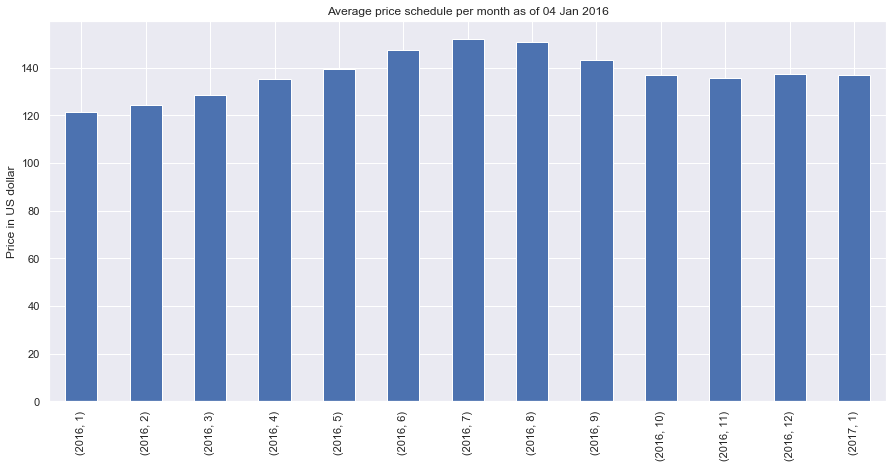

In [24]:
# Plot the average price schedule per month 
calendar.groupby([calendar['date'].dt.year, calendar['date'].dt.month])['price'].mean().plot(kind='bar',figsize=(15,7))
plt.xlabel('')
plt.ylabel('Price in US dollar')
plt.title('Average price schedule per month as of 04 Jan 2016')
plt.show()

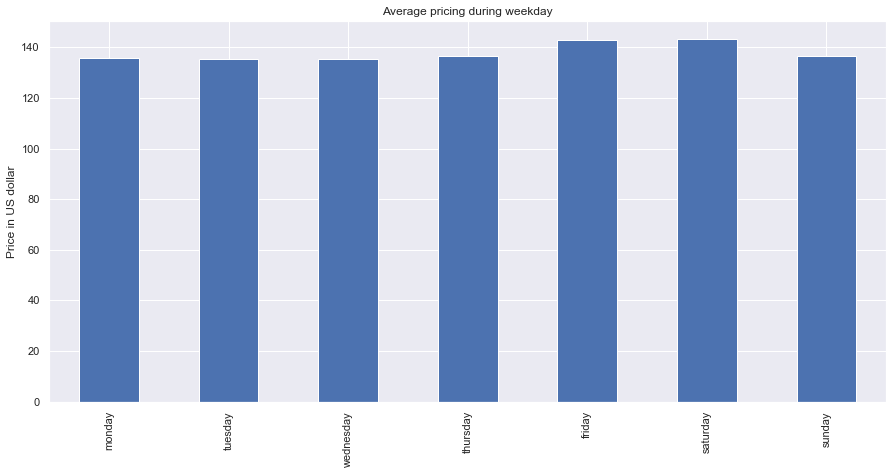

In [25]:
# Plot the average price schedule per month 
weekday_price = pd.DataFrame(calendar.groupby([calendar['date'].dt.weekday])['price'].mean()) 
weekday = pd.DataFrame(['monday', 'tuesday', 'wednesday','thursday','friday','saturday','sunday'], columns=['weekday'])
calendar_weekday = pd.concat([weekday,weekday_price], axis=1)
calendar_weekday.plot(x='weekday',y='price',kind='bar',figsize=(15,7), legend=False)
plt.xlabel('')
plt.ylabel('Price in US dollar')
plt.title('Average pricing during weekday')
plt.show()

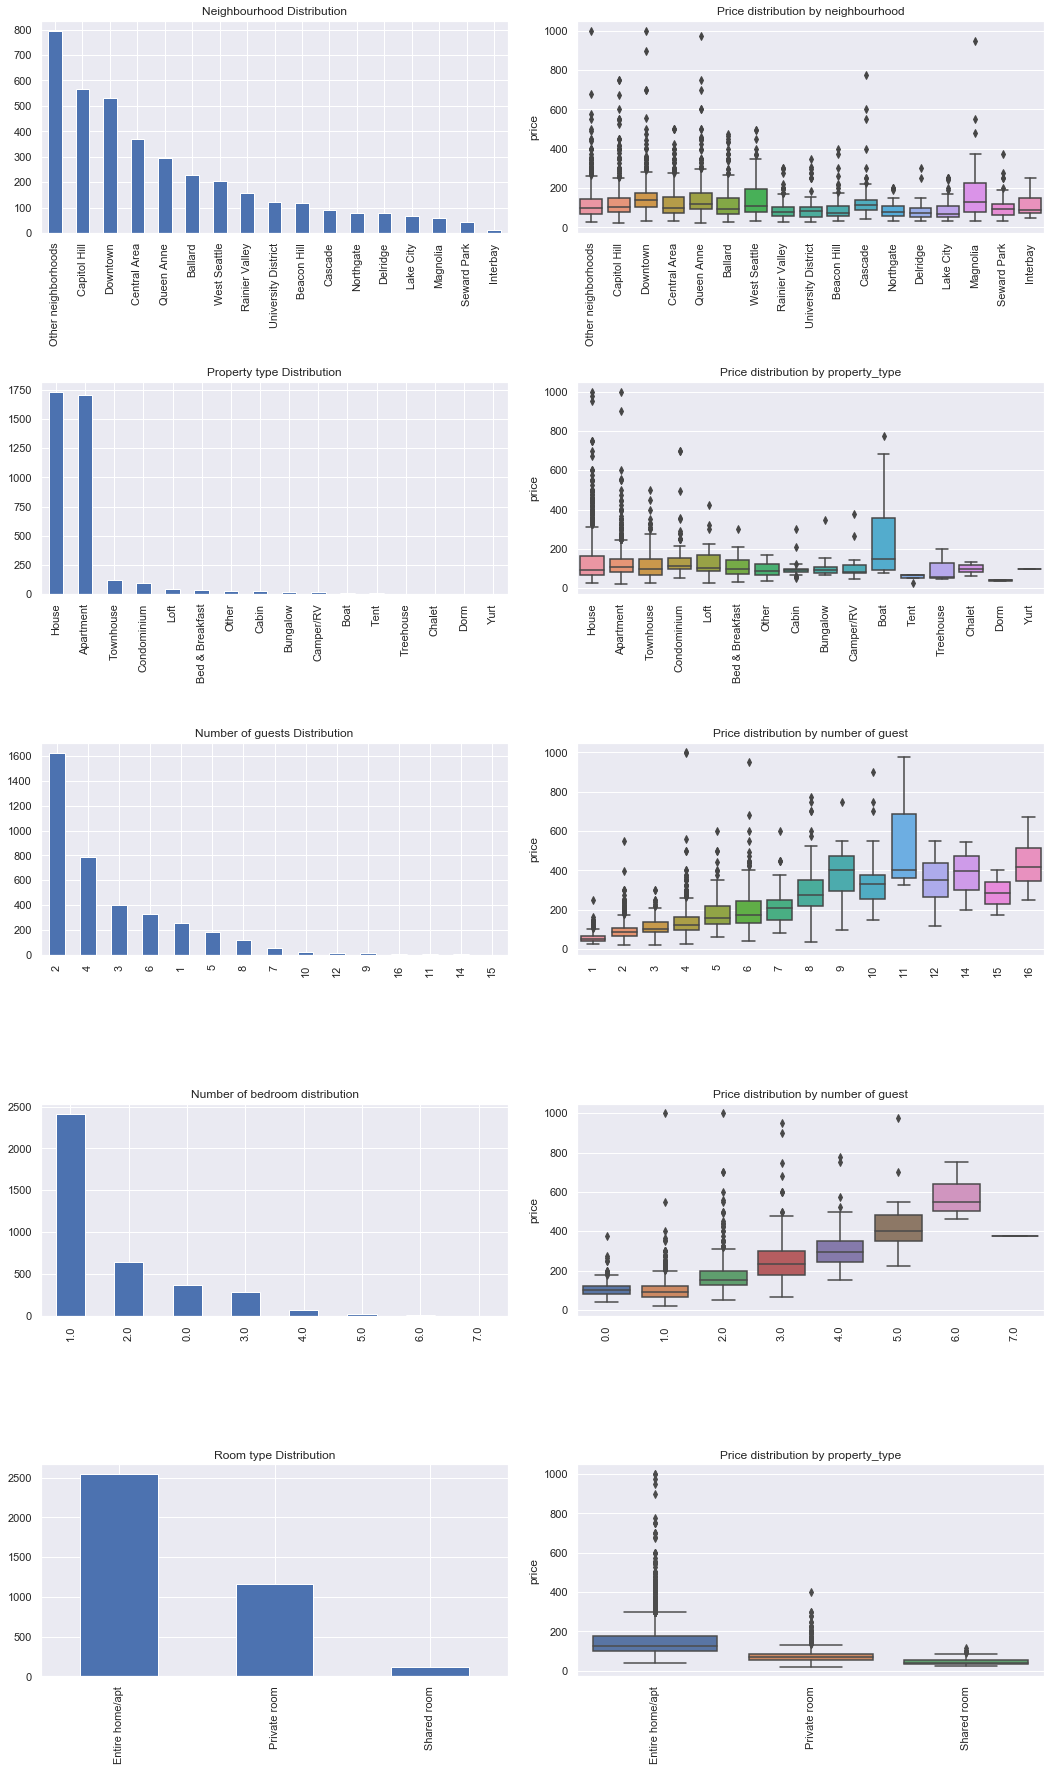

In [26]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(nrows=5,ncols=2, figsize=(15,25))

plt.rcParams.update({'font.size': 20})

# Neighbourhood distribution
listing_cleaned['neighbourhood'].value_counts().plot(kind='bar', ax = ax1) 
ax1.set_title('Neighbourhood Distribution')

# Price boxplot by neighbourhood
order2 = listing_cleaned['neighbourhood'].value_counts().index
sns.boxplot('neighbourhood', 'price', data=listing_cleaned, ax=ax2, order=order2)
ax2.set_title('Price distribution by neighbourhood')
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# Property type distribution
listing_cleaned['property_type'].value_counts().plot(kind='bar', ax = ax3) 
ax3.set_title('Property type Distribution')

# Price boxplot by property type
order4 = listing_cleaned['property_type'].value_counts().index
sns.boxplot('property_type', 'price', data=listing_cleaned, ax=ax4, order=order4)
ax4.set_title('Price distribution by property_type')
ax4.set_xlabel('')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)

# Number of guests distribution
listing_cleaned['accommodates'].value_counts().plot(kind='bar', ax = ax5)
ax5.set_title('Number of guests Distribution')

# Price boxplot by number of guest
sns.boxplot('accommodates', 'price', data=listing_cleaned, ax=ax6)
ax6.set_title('Price distribution by number of guest')
ax6.set_xlabel('')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90)

# Number of bedroom distribution
listing_cleaned['bedrooms'].value_counts().plot(kind='bar', ax = ax7)
ax7.set_title('Number of bedroom distribution')

# Price boxplot by number of guest
sns.boxplot('bedrooms', 'price', data=listing_cleaned, ax=ax8)
ax8.set_title('Price distribution by number of guest')
ax8.set_xlabel('')
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=90)

# Room type distribution
listing_cleaned['room_type'].value_counts().plot(kind='bar', ax = ax9) 
ax9.set_title('Room type Distribution')

# Price boxplot by room type
order10 = listing_cleaned['room_type'].value_counts().index
sns.boxplot('room_type', 'price', data=listing_cleaned, ax=ax10, order=order10)
ax10.set_title('Price distribution by property_type')
ax10.set_xlabel('')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

count    3818.000000
mean      140.566003
std       237.387534
min         0.000000
25%         0.000000
50%         0.000000
75%       200.000000
max      5000.000000
Name: security_deposit, dtype: float64


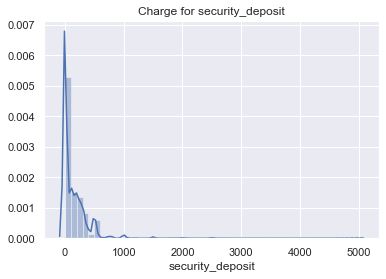

In [27]:
# Charge for security_deposit distribution
print(listing_cleaned['security_deposit'].describe())
sns.distplot(listing_cleaned['security_deposit'])
plt.title('Charge for security_deposit')
plt.show()

count    3818.000000
mean       45.062860
std        49.913798
min         0.000000
25%         0.000000
50%        30.000000
75%        65.000000
max       300.000000
Name: cleaning_fee, dtype: float64


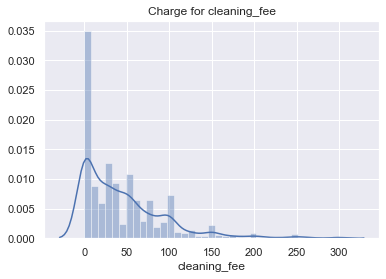

In [28]:
# Charge for cleaning_fee distribution
print(listing_cleaned['cleaning_fee'].describe())
sns.distplot(listing_cleaned['cleaning_fee'])
plt.title('Charge for cleaning_fee')
plt.show()

count    3818.000000
mean       10.667627
std        17.585922
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       300.000000
Name: extra_people, dtype: float64


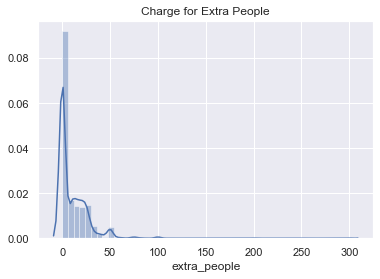

In [29]:
# Charge for extra people distribution
print(listing_cleaned['extra_people'].describe())
sns.distplot(listing_cleaned['extra_people'])
plt.title('Charge for Extra People')
plt.show()

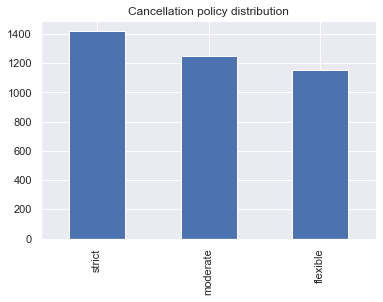

In [30]:
# Number of cancellation policy distribution
listing_cleaned['cancellation_policy'].value_counts().plot(kind='bar')
plt.title('Cancellation policy distribution')
plt.show()

### Question 2- What are the characteristics in term of booking / housing availability?

In [31]:
# Create a table that summarize booking, vacancy, total listing 
unavailable_month = pd.DataFrame(calendar.groupby([calendar['date'].dt.year, calendar['date'].dt.month])['unavailable'].sum())
vacancy_month = pd.DataFrame(calendar.groupby([calendar['date'].dt.year, calendar['date'].dt.month])['available'].sum())
total_listing = pd.DataFrame(unavailable_month['unavailable'] + vacancy_month['available'],columns=['total listing'])
vacancy_summary = pd.concat([unavailable_month, vacancy_month], axis=1)
vacancy_summary = pd.concat([vacancy_summary, total_listing], axis=1)
vacancy_summary['booking/unavailable rate'] = vacancy_summary['unavailable']/vacancy_summary['total listing']*100
vacancy_summary

unavailable  available  total listing  booking/unavailable rate
date date                                                                 
2016 1           47665      59239         106904                 44.586732
     2           37401      73321         110722                 33.779195
     3           34420      83938         118358                 29.081262
     4           38503      76037         114540                 33.615331
     5           38387      79971         118358                 32.432958
     6           37296      77244         114540                 32.561551
     7           44136      74222         118358                 37.290255
     8           42011      76347         118358                 35.494855
     9           37294      77246         114540                 32.559804
     10          35920      82438         118358                 30.348603
     11          32760      81780         114540                 28.601362
     12          31297      87061         118358                 26.442657
2017 1            1938       5698           7636                 25.379780

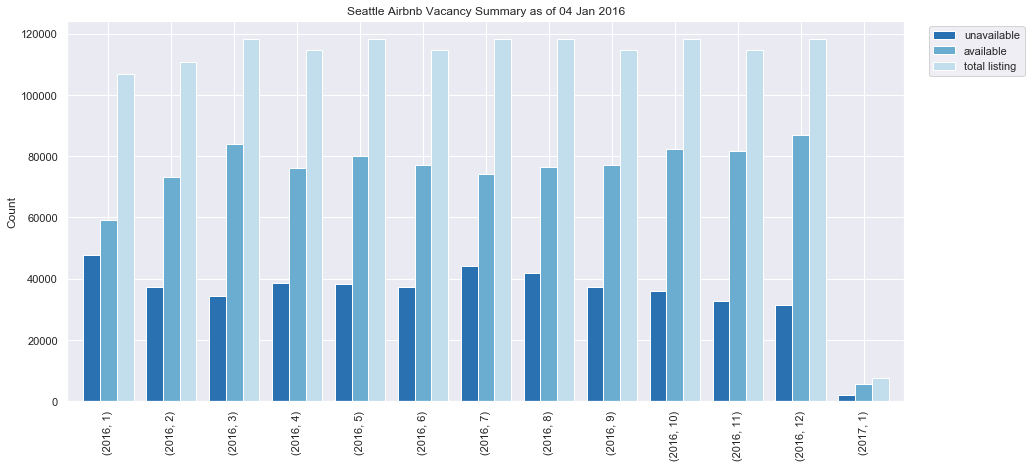

In [32]:
sns.set_palette(sns.color_palette("RdBu_r", 7))
fig, ax1 = plt.subplots()

vacancy_summary.plot(y =['unavailable','available', 'total listing'], ax=ax1, kind='bar',figsize=(15,7),width=0.8)
ax1.set_xlabel('')
ax1.set_ylabel('Count')
ax1.set_title('Seattle Airbnb Vacancy Summary as of 04 Jan 2016')
ax1.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

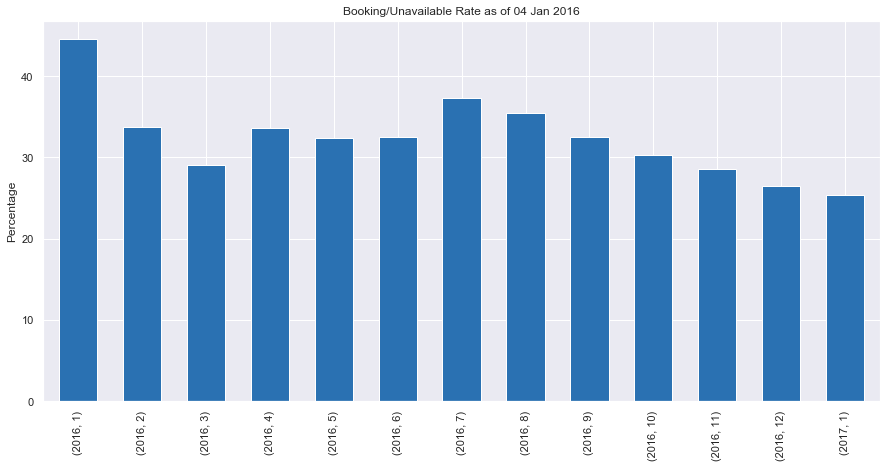

In [33]:
fig, ax1 = plt.subplots()
vacancy_summary.plot(y =['booking/unavailable rate'], ax=ax1, kind='bar',figsize=(15,7),width=0.6, legend=False)
ax1.set_xlabel('')
ax1.set_ylabel('Percentage')
ax1.set_title('Booking/Unavailable Rate as of 04 Jan 2016')
plt.show()

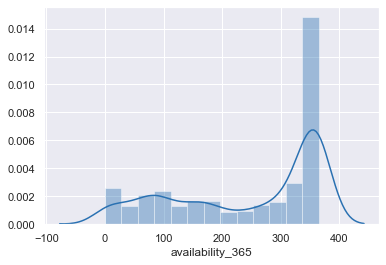

In [34]:
sns.distplot(listing_cleaned['availability_365'])

count    3818.000000
mean      244.772656
std       126.772526
min         0.000000
25%       124.000000
50%       308.000000
75%       360.000000
max       365.000000
Name: availability_365, dtype: float64


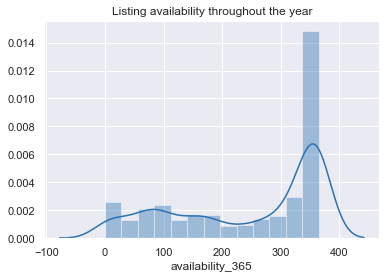

In [35]:
# Plot listing availability throughout the year
print(listing_cleaned['availability_365'].describe())
sns.distplot(listing_cleaned['availability_365'])
plt.title('Listing availability throughout the year')
plt.show()

In [36]:
# Sort properties unavailable during the year
unavailable = listing_cleaned[listing_cleaned['availability_365']==0]
unavailable.T

,142,297,324,368,376,384,500,550,570,600,...,3329,3353,3393,3471,3508,3518,3548,3670,3673,3708
id,4550099,1030411,4122325,6765045,3783162,3773700,8811945,4211836,5489676,6706377,...,2426152,5123904,2808357,8194886,4557204,6993726,1049293,6750264,5625964,3534444
host_response_rate,NaN,NaN,100%,100%,NaN,75%,100%,NaN,100%,67%,...,NaN,NaN,100%,NaN,100%,100%,100%,NaN,NaN,NaN
host_acceptance_rate,NaN,NaN,100%,100%,NaN,100%,100%,NaN,100%,100%,...,NaN,NaN,100%,NaN,100%,100%,NaN,100%,NaN,NaN
host_is_superhost,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
neighbourhood,Ballard,Other neighborhoods,Other neighborhoods,Other neighborhoods,Other neighborhoods,Other neighborhoods,Queen Anne,Other neighborhoods,Cascade,Central Area,...,Northgate,Other neighborhoods,Other neighborhoods,West Seattle,Capitol Hill,Capitol Hill,Capitol Hill,Other neighborhoods,Other neighborhoods,Other neighborhoods
property_type,House,House,House,House,House,House,House,House,Apartment,House,...,Apartment,House,House,Apartment,House,Condominium,Apartment,House,House,House
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Entire home/apt
accommodates,6,4,5,7,8,4,4,2,4,4,...,3,4,7,3,8,5,2,5,2,12
bathrooms,3,2,2,1,2,1.5,1,1,1,1.5,...,1,1,1,1,2.5,1.5,1,1,1,3
bedrooms,3,2,3,3,3,3,2,1,2,1,...,1,3,3,1,4,2,1,2,1,4


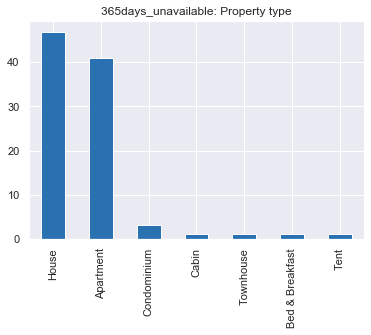

In [37]:
unavailable['property_type'].value_counts().plot(kind='bar')
plt.title('365days_unavailable: Property type')
plt.show()

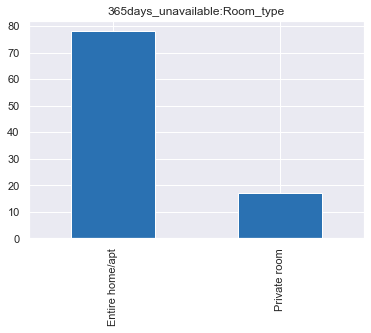

In [38]:
unavailable['room_type'].value_counts().plot(kind='bar')
plt.title('365days_unavailable:Room_type')
plt.show()

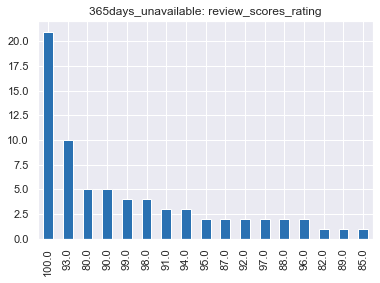

In [39]:
unavailable['review_scores_rating'].value_counts().plot(kind='bar')
plt.title('365days_unavailable: review_scores_rating')
plt.show()

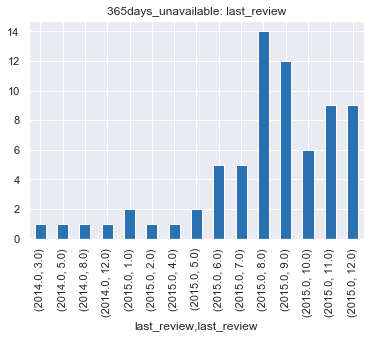

In [40]:
unavailable.groupby([unavailable['last_review'].dt.year, unavailable['last_review'].dt.month])['last_review'].count().plot(kind='bar')
plt.title('365days_unavailable: last_review')
plt.show()

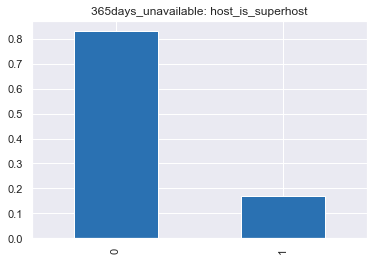

In [41]:
unavailable['host_is_superhost'].value_counts(normalize=True).plot(kind='bar')
plt.title('365days_unavailable: host_is_superhost')
plt.show()

count     95.000000
mean     166.505263
std      137.872812
min       40.000000
25%       82.500000
50%      125.000000
75%      200.000000
max      999.000000
Name: price, dtype: float64


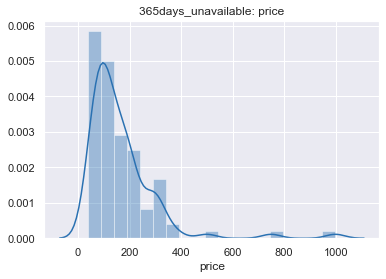

In [42]:
print(unavailable['price'].describe())
sns.distplot(unavailable['price'])
plt.title('365days_unavailable: price')
plt.show()

### Question 3 - What are the key features that influence customer review?

In [43]:
listing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 40 columns):
id                                3818 non-null int64
host_response_rate                3295 non-null object
host_acceptance_rate              3045 non-null object
host_is_superhost                 3818 non-null int64
neighbourhood                     3818 non-null object
property_type                     3817 non-null object
room_type                         3818 non-null object
accommodates                      3818 non-null int64
bathrooms                         3802 non-null float64
bedrooms                          3812 non-null float64
beds                              3817 non-null float64
bed_type                          3818 non-null object
square_feet                       97 non-null float64
price                             3818 non-null float64
weekly_price                      2009 non-null float64
monthly_price                     1517 non-null float64
security_de

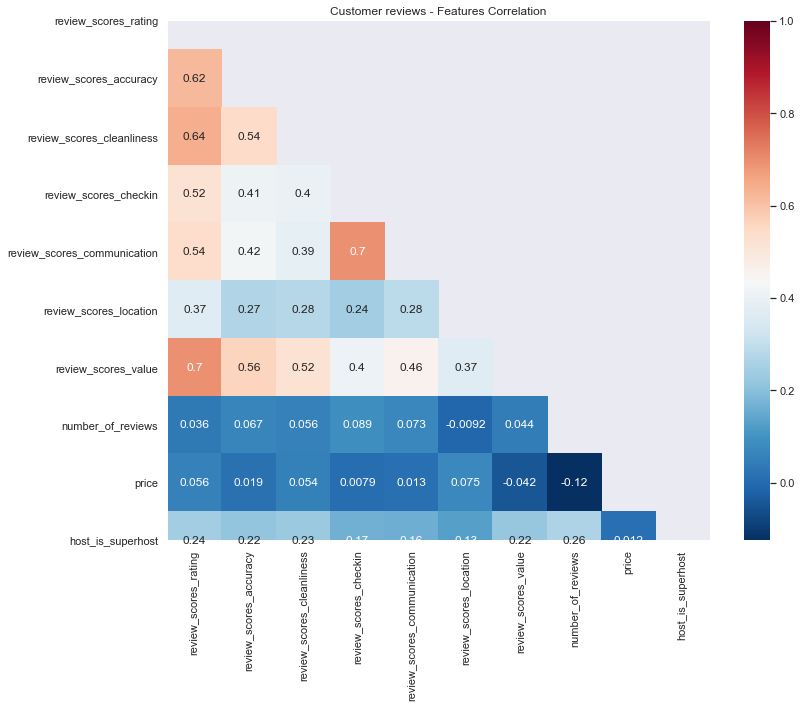

In [44]:
cols = ['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
        'review_scores_communication','review_scores_location', 'review_scores_value', 'number_of_reviews',
       'price','host_is_superhost']

sns.set()
corr = listing_cleaned[cols].corr()
f,ax = plt.subplots(figsize=(12,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, ax=ax,annot=True, cmap="RdBu_r")
ax.set_title("Customer reviews - Features Correlation")
plt.tight_layout()
plt.show()
